In [1]:
import pandas as pd
import pyreadstat
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Se leen los datos con el etiquedado provisto por INEGI
carpeta = "C:\\Users\\Usuario\\Desktop\\Artículo\\ENOE\\enoen nuevo\\"
# COE1
coe1t422, meta = pyreadstat.read_dta(carpeta + "ENOEN_COE1T422.dta")
# COE2
coe2t422, meta = pyreadstat.read_dta(carpeta + "ENOEN_COE2T422.dta")
# HOG
hogt422, meta = pyreadstat.read_dta(carpeta + "ENOEN_HOGT422.dta")
# SDEM
sdemt422, meta = pyreadstat.read_dta(carpeta + "ENOEN_SDEMT422.dta")
# VIV
vivt422, meta = pyreadstat.read_dta(carpeta + "ENOEN_VIVT422.dta")

In [4]:
# Corregir nombres de las categorías
# duplicated_categories = ['Complemento urbano- Rural']

# # Realiza las correcciones
# for category in duplicated_categories:
#     corrected_category = category.replace(' ', '')  # Elimina el espacio adicional
#     vivt422['cd_a'] = vivt422['cd_a'].cat.rename_categories({category: corrected_category})

In [3]:
# Seleccionando identificadores de acuerdo al INEGI
idvivienda = ['cd_a','ent', 'con', "v_sel"]
idhogar = ['cd_a','ent', 'con', "v_sel", "n_hog", "h_mud"]
idpersona = ["cd_a","ent", "con", "v_sel", "n_hog", "h_mud", "n_ren"]

In [4]:
# Merge de tablas coet1 y coet2
coet422 = pd.merge(coe1t422, coe2t422, on= idpersona)

In [5]:
coet422.columns

Index(['r_def', 'cd_a', 'ent', 'con', 'upm_x', 'd_sem_x', 'n_pro_viv_x',
       'v_sel', 'n_hog', 'h_mud',
       ...
       'p9_h7', 'p9_m7', 'p9_8', 'p9_h8', 'p9_m8', 'ur_y', 'tipo_y',
       'mes_cal_y', 'fac_tri_y', 'fac_men_y'],
      dtype='object', length=247)

In [7]:
# Renombramos variables
coet422 = coet422.rename(columns={'p1': 'p1coe', 'p3': 'p3coe'})

In [6]:
# Tabulado para revisar variables repetidas 
tabla = pd.crosstab(coet422['n_ent_x'], coet422['n_ent_y']) # 'n_ent' es el número de entrevista
print(tabla)

# coet422[['n_ent_x', 'n_ent_y']]

n_ent_y    1.0    2.0    3.0    4.0    5.0
n_ent_x                                   
1.0      65103      0      0      0      0
2.0          0  64334      0      0      0
3.0          0      0  65395      0      0
4.0          0      0      0  64109      0
5.0          0      0      0      0  63929


In [7]:
# Se eliminan las variables que son iguales devolviendo sus valores originales
# Elimina columnas que terminan con "_y"
columnas_eliminar = [col for col in coet422.columns if col.endswith('_y')]
coet422 = coet422.drop(columns = columnas_eliminar)
# Cambia nombres de columnas que terminan con "_x"
coet422 = coet422.rename(columns={col: col.split('_')[0] for col in coet422.columns if col.endswith('_x')})
print(coet422.shape)

(322870, 235)


In [8]:
# fusionar la información de personas mayores de 12 años del COE con el reporte del cuestionario sociodemográfico
sdemcoet422 = pd.merge(sdemt422, coet422, on=idpersona)
print(sdemcoet422.shape)

(322870, 342)


In [9]:
# Limpieza de la repetición de variables
# Elimina columnas que terminan con "_y"
columnas_eliminar = [col for col in sdemcoet422.columns if col.endswith('_y')]
sdemcoet422 = sdemcoet422.drop(columns = columnas_eliminar)
# Cambia nombres de columnas que terminan con "_x"
sdemcoet422 = sdemcoet422.rename(columns={col: col.split('_')[0] for col in sdemcoet422.columns if col.endswith('_x')})  
print(sdemcoet422.shape)

(322870, 336)


In [10]:
# fusionar la información de vivienda y hogar. A una vivienda pueden corresponder varios hogares
vivhogt422 = pd.merge(vivt422, hogt422, on=idvivienda)
print(vivhogt422.shape)

(133108, 57)


In [11]:
# Limpieza de repetición de variables
# Elimina columnas que terminan con "_y"
columnas_eliminar = [col for col in vivhogt422.columns if col.endswith('_y')]
vivhogt422 = vivhogt422.drop(columns = columnas_eliminar)
# Cambia nombres de columnas que terminan con "_x"
vivhogt422 = vivhogt422.rename(columns={col: col.split('_')[0] for col in vivhogt422.columns if col.endswith('_x')})  
print(vivhogt422.shape)

(133108, 39)


In [12]:
completat422 = pd.merge(vivhogt422, sdemcoet422, on= idhogar)
print(completat422.shape)

(322870, 369)


In [13]:
# Elimina columnas que terminan con "_y"
columnas_eliminar = [col for col in completat422.columns if col.endswith('_y')]
completat422 = completat422.drop(columns = columnas_eliminar)
# Cambia nombres de columnas que terminan con "_x"
completat422 = completat422.rename(columns={col: col.split('_')[0] for col in completat422.columns if col.endswith('_x')})  
print(completat422.shape)

(322870, 350)


In [14]:
completat422 = completat422.drop(completat422[(completat422['r_def'] != 0) | (completat422['c_res'] == 2)].index)

In [15]:
print(completat422.columns[completat422.columns.duplicated()].tolist())

['est', 'est', 't', 'n', 'fac', 'p4', 'p4']


In [ ]:
completat422['sex','niv_ins','t_loc_men',
             'clase1','clase2','clase3',
             'rama', 'c_ocu11c',
             'ing7c','ingocup','ing_x_hrs',
             'fac','est_d_men','upm'] = completat422['sex', 'eda','niv_ins', 't_loc_men',
                                                     'clase1','clase2','clase3','rama', 
                                                     'c_ocu11c','ing7c','ingocup','ing_x_hrs',
                                                     'fac','est_d_men','upm'].astype('category')


In [16]:
cols = [col for col in completat422.columns]
cols

['loc',
 'mun',
 'est',
 'est',
 'est',
 'ageb',
 't',
 't',
 'cd_a',
 'ent',
 'con',
 'upm',
 'd',
 'n',
 'v_sel',
 'n',
 'per',
 'p1',
 'p2',
 'p3',
 'ur',
 'tipo',
 'mes',
 'fac',
 'fac',
 'n_hog',
 'h_mud',
 'r_pre',
 'p_dia',
 'p_mes',
 'p_anio',
 'r_def',
 'd_dia',
 'd_mes',
 'd_anio',
 'e_obs',
 'p4',
 'p4',
 'inf',
 'r',
 'est_d_tri',
 'est_d_men',
 't_loc_tri',
 't_loc_men',
 'd_sem',
 'n_pro_viv',
 'n_ent',
 'n_ren',
 'c_res',
 'par_c',
 'sex',
 'eda',
 'nac_dia',
 'nac_mes',
 'nac_anio',
 'l_nac_c',
 'cs_p12',
 'cs_p13_1',
 'cs_p13_2',
 'cs_p14_c',
 'cs_p15',
 'cs_p16',
 'cs_p17',
 'n_hij',
 'e_con',
 'cs_p20a_1',
 'cs_p20a_c',
 'cs_p20b_1',
 'cs_p20b_c',
 'cs_p20c_1',
 'cs_ad_mot',
 'cs_p21_des',
 'cs_ad_des',
 'cs_nr_mot',
 'cs_p23_des',
 'cs_nr_ori',
 'zona',
 'salario',
 'fac_tri',
 'fac_men',
 'clase1',
 'clase2',
 'clase3',
 'pos_ocu',
 'seg_soc',
 'rama',
 'c_ocu11c',
 'ing7c',
 'dur9c',
 'emple7c',
 'medica5c',
 'buscar5c',
 'rama_est1',
 'rama_est2',
 'dur_est',
 'a

In [32]:
# completat422.to_csv("completat422.csv", index = False)

In [17]:
completat422 = pd.read_csv("completat422.csv")

import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
base_descrip = completat422[['sex', 'eda','niv_ins', 't_loc_men',
                            'clase1','clase2','clase3',
                            'rama', 'c_ocu11c',
                            'ing7c','ingocup','ing_x_hrs',
                            'fac','est_d_men','upm']]

Text(0.5, 1.0, 'Cantidad de Encuestados por Sexo')

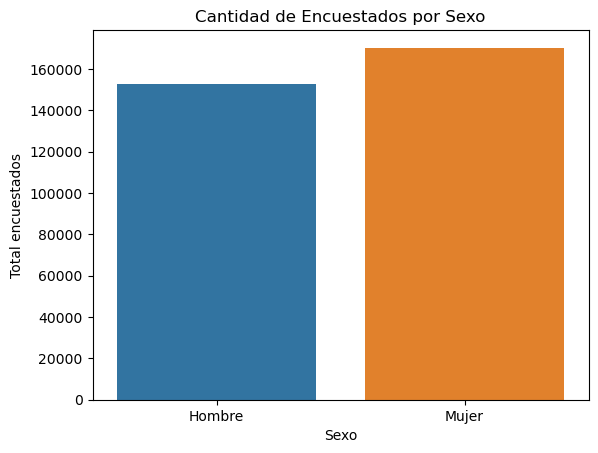

In [37]:
sns.countplot(x='sex', data=base_descrip).set_xticklabels(['Hombre', 'Mujer'], rotation=0)
plt.xlabel('Sexo')
plt.ylabel('Total de encuestados')
plt.title('Cantidad de Encuestados por Sexo')

In [49]:
nivel_ins = base_descrip[base_descrip['niv_ins']!=5]
total = nivel_ins['niv_ins'].count()

tabla_educ_niv = nivel_ins[['niv_ins']].value_counts().reset_index()
tabla_educ_niv.columns=['niv_ins','n']
tabla_educ_niv['percent'] = (tabla_educ_niv['n']/total*100)
fila_total = pd.DataFrame({'niv_ins': ['Total'], 'n': [total], 'percent': [100]})
tabla_educ_niv = tabla_educ_niv.sort_values(by='niv_ins')
nivel_educt = tabla_educ_niv.append(fila_total, ignore_index=True)
nivel_educt

,niv_ins,n,percent
0,1.0,33789,10.476170
1,2.0,63192,19.592475
2,3.0,102802,31.873427
3,4.0,122749,38.057929
4,Total,322532,100.000000


Text(0, 0.5, 'Encuestados')

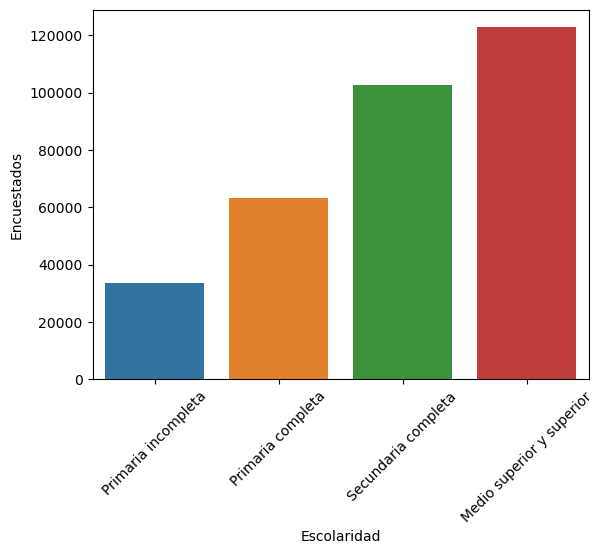

In [ ]:
niveles_educacion = ["Primaria incompleta","Primaria completa","Secundaria completa","Medio superior y superior"]#,"Total"]
sns.barplot(x='niv_ins',y="n", data=nivel_educt[0:4]).set_xticklabels(niveles_educacion, rotation=45)
plt.xlabel('Escolaridad')
plt.ylabel('Encuestados')

In [25]:
tabla_sex_educ = nivel_ins[['sex','niv_ins']].value_counts().reset_index()
tabla_sex_educ.columns=['Sexo','niv_ins','tamaño']
tabla_by_sex = tabla_sex_educ[tabla_sex_educ['Sexo'].isin([1,2])]
tabla_by_sex['Sexo'] = tabla_by_sex['Sexo'].apply(lambda x: 'Hombre' if x == 1 else 'Mujer')
tabla_by_sex

,Sexo,niv_ins,tamaño
0,Mujer,4.0,62512
1,Hombre,4.0,60237
2,Mujer,3.0,55691
3,Hombre,3.0,47111
4,Mujer,2.0,33312
5,Hombre,2.0,29880
6,Mujer,1.0,18576
7,Hombre,1.0,15213


Text(0, 0.5, 'Encuestados')

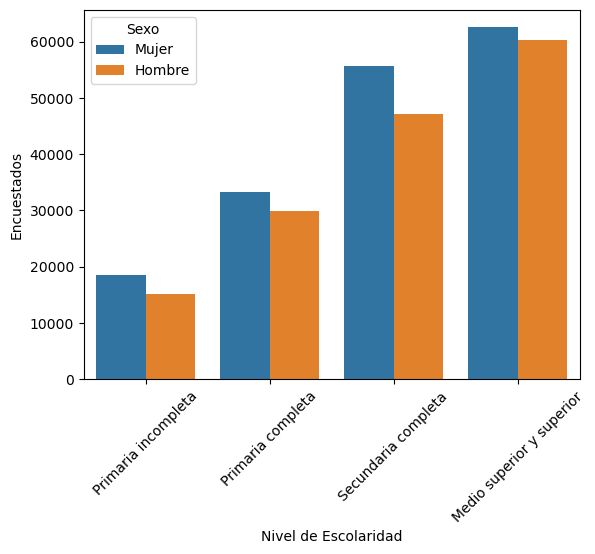

In [26]:
niv_educ = ["Primaria incompleta","Primaria completa","Secundaria completa","Medio superior y superior"]
sns.barplot(data=tabla_by_sex, x='niv_ins',y="tamaño",hue='Sexo' ).set_xticklabels(niv_educ, rotation=45)
plt.xlabel('Nivel de Escolaridad')
plt.ylabel('Encuestados')

In [27]:
niveles_educacion = ["Primaria incompleta","Primaria completa","Secundaria completa","Medio superior y superior","Total"]
by_sexo_educ = tabla_by_sex.groupby(['Sexo','niv_ins']).sum()
sex_educ = by_sexo_educ.pivot_table(index='niv_ins',columns='Sexo', values='tamaño')
sex_educ['Total'] = sex_educ.sum(axis=1)
t_sum = pd.DataFrame({'Hombre':[sex_educ["Hombre"].sum()],'Mujer':[sex_educ["Mujer"].sum()], 'Total':[sex_educ["Total"].sum()]})
sex_educ = sex_educ.append(t_sum, ignore_index=True)
sex_educ.insert(0, "Educacion", niveles_educacion)
sex_educ

,Educacion,Hombre,Mujer,Total
0,Primaria incompleta,15213,18576,33789
1,Primaria completa,29880,33312,63192
2,Secundaria completa,47111,55691,102802
3,Medio superior y superior,60237,62512,122749
4,Total,152441,170091,322532


In [28]:
sex_educ_percent = sex_educ.copy()
sex_educ_percent['Hombre'] = (sex_educ_percent['Hombre'] / sex_educ_percent['Hombre'].max())*100
sex_educ_percent['Mujer'] = (sex_educ_percent['Mujer'] / sex_educ_percent['Mujer'].max())*100
sex_educ_percent['Total'] = (sex_educ_percent['Total'] / sex_educ_percent['Total'].max())*100
sex_educ_percent[['Hombre','Mujer','Total']]=sex_educ_percent[['Hombre','Mujer','Total']].applymap('{:.2f}%'.format)
sex_educ_percent

,Educacion,Hombre,Mujer,Total
0,Primaria incompleta,9.98%,10.92%,10.48%
1,Primaria completa,19.60%,19.58%,19.59%
2,Secundaria completa,30.90%,32.74%,31.87%
3,Medio superior y superior,39.51%,36.75%,38.06%
4,Total,100.00%,100.00%,100.00%


**9.98%** del 100% de los **hombres mayores de 5 años** tienen un nivel de instrucción de **primaria incompleta**

**39.51%** del 100% de los **hombres** tienen un nivel de instrucción **Medio superior y superior**

In [29]:
percent_by_total = sex_educ.copy()
percent_by_total['Hombre'] = (percent_by_total['Hombre'] / percent_by_total['Total'])*100
percent_by_total['Mujer'] = (percent_by_total['Mujer'] / percent_by_total['Total'])*100
percent_by_total['Total'] = (percent_by_total['Total'] / percent_by_total['Total'])*100
percent_by_total[['Hombre','Mujer','Total']]=percent_by_total[['Hombre','Mujer','Total']].applymap('{:.2f}%'.format)
percent_by_total

,Educacion,Hombre,Mujer,Total
0,Primaria incompleta,45.02%,54.98%,100.00%
1,Primaria completa,47.28%,52.72%,100.00%
2,Secundaria completa,45.83%,54.17%,100.00%
3,Medio superior y superior,49.07%,50.93%,100.00%
4,Total,47.26%,52.74%,100.00%


El **45.02%** del 100% de quienes tienen **primaria incompleta** son **hombres**

El **50.93%** del 100% de quienes tienen educación **Media superior y superior** son **mujeres**

In [30]:
fintabla_by_total = sex_educ.copy()
fintabla_by_total['Hombre'] = (fintabla_by_total['Hombre'] / fintabla_by_total['Total'].max())*100
fintabla_by_total['Mujer'] = (fintabla_by_total['Mujer'] / fintabla_by_total['Total'].max())*100
fintabla_by_total['Total'] = (fintabla_by_total['Total'] / fintabla_by_total['Total'].max())*100
fintabla_by_total[['Hombre','Mujer','Total']] = fintabla_by_total[['Hombre','Mujer','Total']].applymap('{:.2f}%'.format)
fintabla_by_total

,Educacion,Hombre,Mujer,Total
0,Primaria incompleta,4.72%,5.76%,10.48%
1,Primaria completa,9.26%,10.33%,19.59%
2,Secundaria completa,14.61%,17.27%,31.87%
3,Medio superior y superior,18.68%,19.38%,38.06%
4,Total,47.26%,52.74%,100.00%


Podemos señalar que el **4.72%** de la población en edad escolar es **hombre** y tiene la **primaria incompleta**

El **19.38%** de la población en edad escolar es **mujer** y tiene educación **Media superior y superior** 

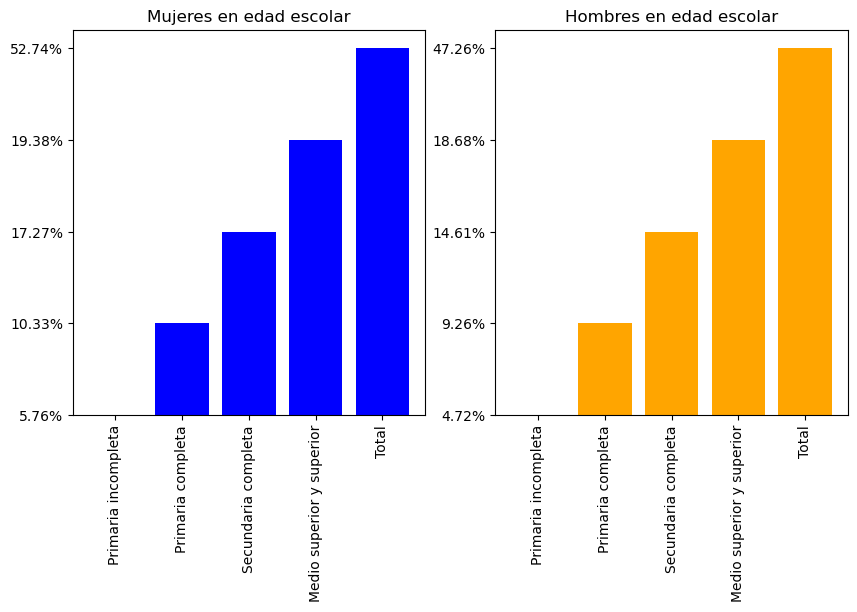

In [31]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].bar(fintabla_by_total['Educacion'],fintabla_by_total['Mujer'], color = "blue")
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_title('Mujeres en edad escolar')

ax[1].bar(fintabla_by_total['Educacion'],fintabla_by_total['Hombre'], color = "orange")
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_title('Hombres en edad escolar')
plt.show()